In [84]:
import os
import random
import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

from datetime import timedelta
from multiprocessing import cpu_count
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid

############################## Write your code ##############################
##### Optional
# Import more if you may
# Note: If there is an import error when grading, you will get F
# Hint: Stick to the often used packages
#############################################################################

In [85]:
SEED = 42

os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.benchmark = True

GPU = 0

device = torch.device(f'cuda:{GPU}' if torch.cuda.is_available() else 'cpu')

def fake_z(batch_size, noise, device):
    return torch.randn(batch_size, noise, device=device)

In [86]:
transform = transforms.Compose([
############################## Write your code ##############################
# Transform your data

transforms.ToTensor(),
transforms.Normalize(mean=(0.5), std=(0.5))

#############################################################################
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

In [87]:
############################## Write your code ##############################
##### Optional
# Change BATCH_SIZE if you may
BATCH_SIZE = 2 ** 8

# Change NUM_WORKERS if you may
if cpu_count() > 5:
    NUM_WORKERS = cpu_count() // 2
elif cpu_count() < 2:
    NUM_WORKERS = 0
else:
    NUM_WORKERS = 2
#############################################################################
    
trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

In [88]:
############################## Write your code ##############################
# Build Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.Gen = nn.Sequential(
            nn.Linear(100, 256),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, 784),
            nn.Tanh(),
        )
        pass

    def forward(self, x):
        output = x
        output = self.Gen(output)
        return output
#############################################################################

In [89]:
############################## Write your code ##############################
# Build Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.Dis = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
        pass

    def forward(self, x):
        output = x
        output = self.Dis(output)
        return output
#############################################################################

In [90]:
############################## Write your code ##############################
# Set your model(s), optimizer(s), and loss function(s)

noise = 100
criterion = nn.BCELoss()

generator = Generator().to(device)
discriminator = Discriminator().to(device)

gen_optimizer = optim.Adam(generator.parameters(), lr = 0.0002)
dis_optimizer = optim.Adam(discriminator.parameters(), lr = 0.0002)

#############################################################################

Epoch [5/240] Elapsed time: 0:00:35.243060
Epoch [10/240] Elapsed time: 0:01:10.945351
Epoch [15/240] Elapsed time: 0:01:47.157170
Epoch [20/240] Elapsed time: 0:02:22.575107


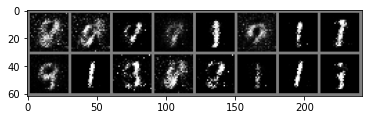

Epoch [25/240] Elapsed time: 0:02:57.848152
Epoch [30/240] Elapsed time: 0:03:32.848315
Epoch [35/240] Elapsed time: 0:04:08.123890
Epoch [40/240] Elapsed time: 0:04:43.169700


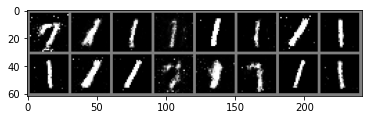

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4bc57089e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4bc57089e0>
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Traceback (most recent call last):
AssertionError: can only test a child process
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch [45/240] Elapsed time: 0:05:19.665518


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4bc57089e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4bc57089e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Epoch [50/240] Elapsed time: 0:05:55.906044


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4bc57089e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4bc57089e0>
    self._shutdown_workers()
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child

Epoch [55/240] Elapsed time: 0:06:31.942213
Epoch [60/240] Elapsed time: 0:07:07.136822


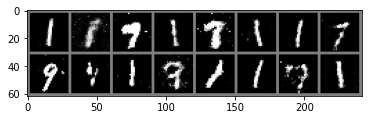

Epoch [65/240] Elapsed time: 0:07:42.300680
Epoch [70/240] Elapsed time: 0:08:17.351105
Epoch [75/240] Elapsed time: 0:08:52.280037
Epoch [80/240] Elapsed time: 0:09:27.408901


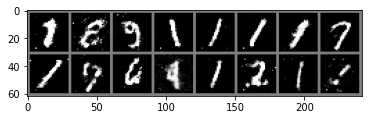

Epoch [85/240] Elapsed time: 0:10:02.667387
Epoch [90/240] Elapsed time: 0:10:37.719743
Epoch [95/240] Elapsed time: 0:11:12.738903
Epoch [100/240] Elapsed time: 0:11:47.777843


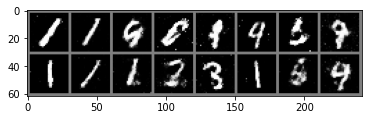

Epoch [105/240] Elapsed time: 0:12:23.133890
Epoch [110/240] Elapsed time: 0:12:58.184334
Epoch [115/240] Elapsed time: 0:13:33.280829
Epoch [120/240] Elapsed time: 0:14:08.358618


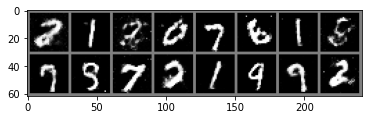

Epoch [125/240] Elapsed time: 0:14:43.696550
Epoch [130/240] Elapsed time: 0:15:19.149834
Epoch [135/240] Elapsed time: 0:15:54.097496
Epoch [140/240] Elapsed time: 0:16:29.405130


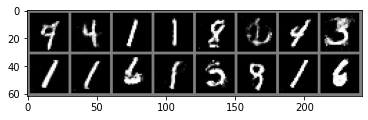

Epoch [145/240] Elapsed time: 0:17:04.487686
Epoch [150/240] Elapsed time: 0:17:39.543880
Epoch [155/240] Elapsed time: 0:18:14.490504
Epoch [160/240] Elapsed time: 0:18:49.446976


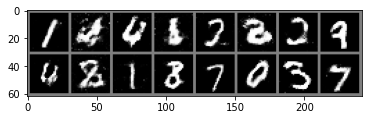

Epoch [165/240] Elapsed time: 0:19:24.902344
Epoch [170/240] Elapsed time: 0:20:00.338461
Epoch [175/240] Elapsed time: 0:20:35.550590
Epoch [180/240] Elapsed time: 0:21:10.507513


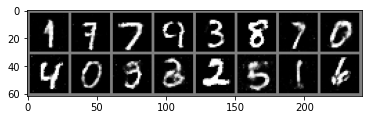

Epoch [185/240] Elapsed time: 0:21:45.616559
Epoch [190/240] Elapsed time: 0:22:20.914323
Epoch [195/240] Elapsed time: 0:22:56.092429
Epoch [200/240] Elapsed time: 0:23:31.065439


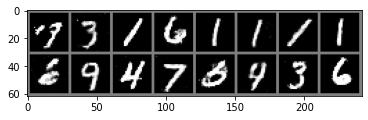

Epoch [205/240] Elapsed time: 0:24:06.201302
Epoch [210/240] Elapsed time: 0:24:41.352237
Epoch [215/240] Elapsed time: 0:25:16.845895
Epoch [220/240] Elapsed time: 0:25:52.095215


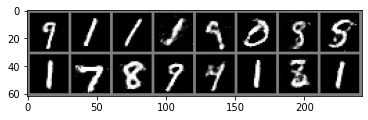

Epoch [225/240] Elapsed time: 0:26:27.391340
Epoch [230/240] Elapsed time: 0:27:02.503919
Epoch [235/240] Elapsed time: 0:27:37.374715
Epoch [240/240] Elapsed time: 0:28:12.788606


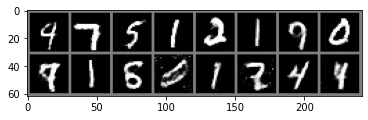

In [92]:
############################## Write your code ##############################
##### Optional
# Change the training process below so it would fit your model
# Note: You must print 16 generated images every 20 epochs to show progress
EPOCHS = 240

start = time.time()

for ep in range(EPOCHS):

    generator.train()
    discriminator.train()
    for image, _ in trainloader:
        batch_size = image.size(0)

        image = image.to(device)
 
        real_label = torch.ones(batch_size).view(-1, 1).to(device)
        fake_label = torch.zeros(batch_size).view(-1, 1).to(device)

        dis_optimizer.zero_grad()

        real_output = discriminator(image.view(-1, 28 * 28))
        fake_output = discriminator(generator(fake_z(batch_size, noise, device)))

        real_loss = criterion(real_output, real_label)
        fake_loss = criterion(fake_output, fake_label)
        dis_loss = real_loss + fake_loss
  
        dis_loss.backward()
        dis_optimizer.step()

        gen_optimizer.zero_grad()
  
        fake_output = discriminator(generator(fake_z(batch_size, noise, device)))
  
        gen_loss = criterion(fake_output, real_label)
  
        gen_loss.backward()
        gen_optimizer.step()

    # Print time spent every 5 epochs
    if (ep + 1) % 5 == 0:
        print('Epoch [{}/{}] Elapsed time: {}'.format(ep + 1, EPOCHS, timedelta(seconds=time.time() - start)))

    # Generate 16 images every 20 epochs
    if (ep + 1) % 20 == 0:
        discriminator.eval()
        generator.eval()

        with torch.no_grad():
            image = make_grid(generator(fake_z(16, noise, device)).view(-1, 1, 28, 28).detach().cpu())
            image = (image + 1) / 2
            image = image.numpy()
            image = np.transpose(image, (1, 2, 0))
            plt.imshow(image)
            plt.show()
#############################################################################